In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing ml models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import plot_tree
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
# Load the dataset using pandas csv function
loan=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [7]:
# Randomly checking 5 rows for data understanding
loan.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
858,859,45,19,19,94720,3,0.5,2,0,0,0,0,1,0
3887,3888,24,-2,118,92634,2,7.2,1,0,0,1,0,1,0
679,680,55,31,103,92093,3,1.8,2,364,0,0,0,0,0
2381,2382,33,9,49,94928,1,2.4,2,0,0,0,0,1,0
13,14,59,32,40,94920,4,2.5,2,0,0,0,0,1,0


In [8]:
# To check the number of rows and columns
loan.shape

(5000, 14)

In [9]:
# To check the datatypes of features
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# To check if missing data is present
loan.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
# To check if the duplicated rows are present
duplicated_rows=loan[loan.duplicated()]
duplicated_rows.shape[0]

0

In [12]:
# To find out the summary statistics
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Initial Observations**
- The data has 5000 rows and 14 features.
- The data is quite clean as it has no missing values. All the features has appropraite data types. There is no duplicated row present in the data as well.
- Income: Average income is 73,774 with a standard deviation of $46,033, indicating significant variability. It's a crucial factor for loan eligibility and willingness to take on additional financial obligations.

- CCAvg: Average monthly spending on credit cards suggests spending habits and financial stability. Higher spending could indicate a greater capacity to repay loans.

- Education: Average education level is around 1.88, potentially reflecting financial literacy and understanding of loan terms. Higher education levels may correlate with a higher likelihood of accepting a personal loan offer.

- CD_Account: Presence of a CD account implies a pre-existing relationship and trust with the bank, possibly influencing the decision to accept a personal loan offer.

- Online: Use of online banking facilities reflects comfort with digital services and may impact the likelihood of accepting a personal loan offer, especially if the loan application process is online.

- There is one discripancy present in the experience feature as it contains the negative values as well. We will deal with them in data preprocessing.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

##Univariate analysis

##Approach
- I will divide the available features into 2 categories including numerical and categorical data. For numerical data I will plot histogram and boxplot to view their distribution and outliers if present. For the categorical data I will plot countplot to view their distribution.

In [13]:
# Count the number of customers with credit cards (where CreditCard = 1)
num_customers_with_credit_cards = loan['CD_Account'].sum()

print("Number of customers with credit cards:", num_customers_with_credit_cards)

Number of customers with credit cards: 302


In [14]:
loan['CD_Account'].value_counts()

CD_Account
0    4698
1     302
Name: count, dtype: int64

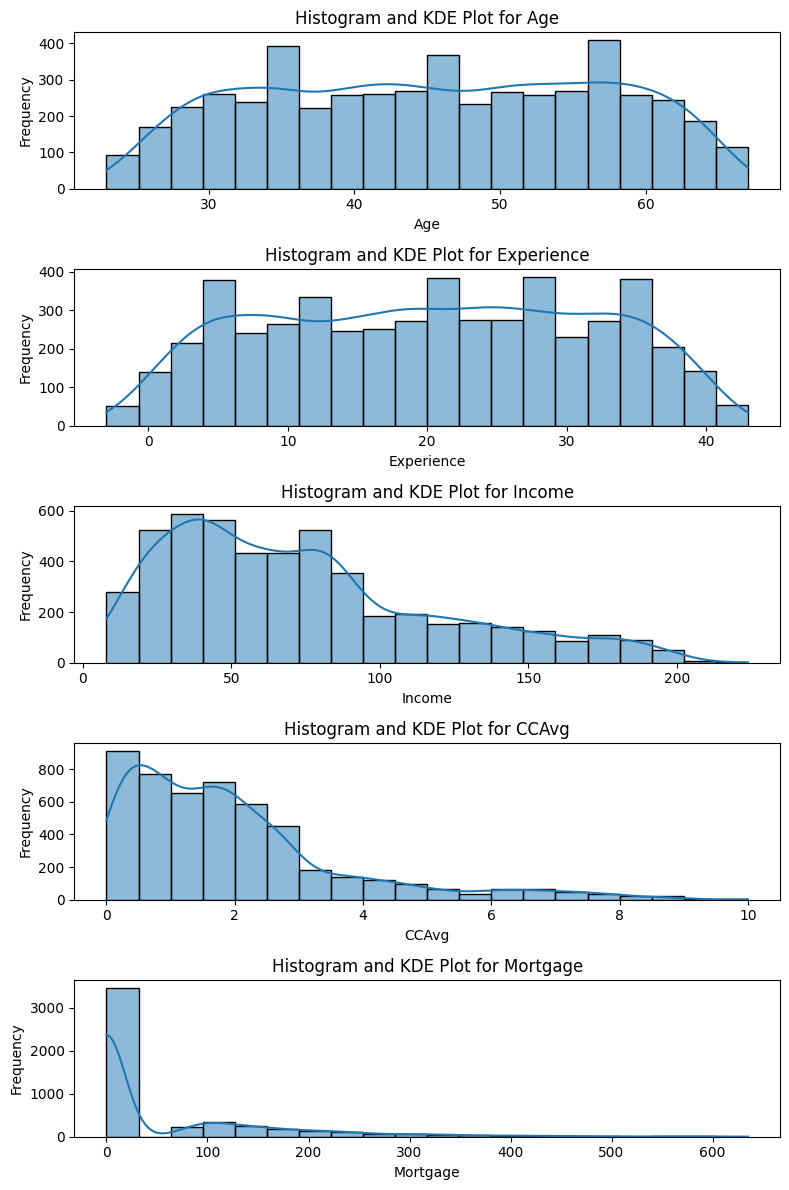

In [15]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

# Variables to plot
variables = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Iterate over variables
for i, var in enumerate(variables):
    # Plot histogram
    sns.histplot(data=loan, x=var, kde=True, ax=axes[i], bins=20)
    # Set title
    axes[i].set_title(f'Histogram and KDE Plot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

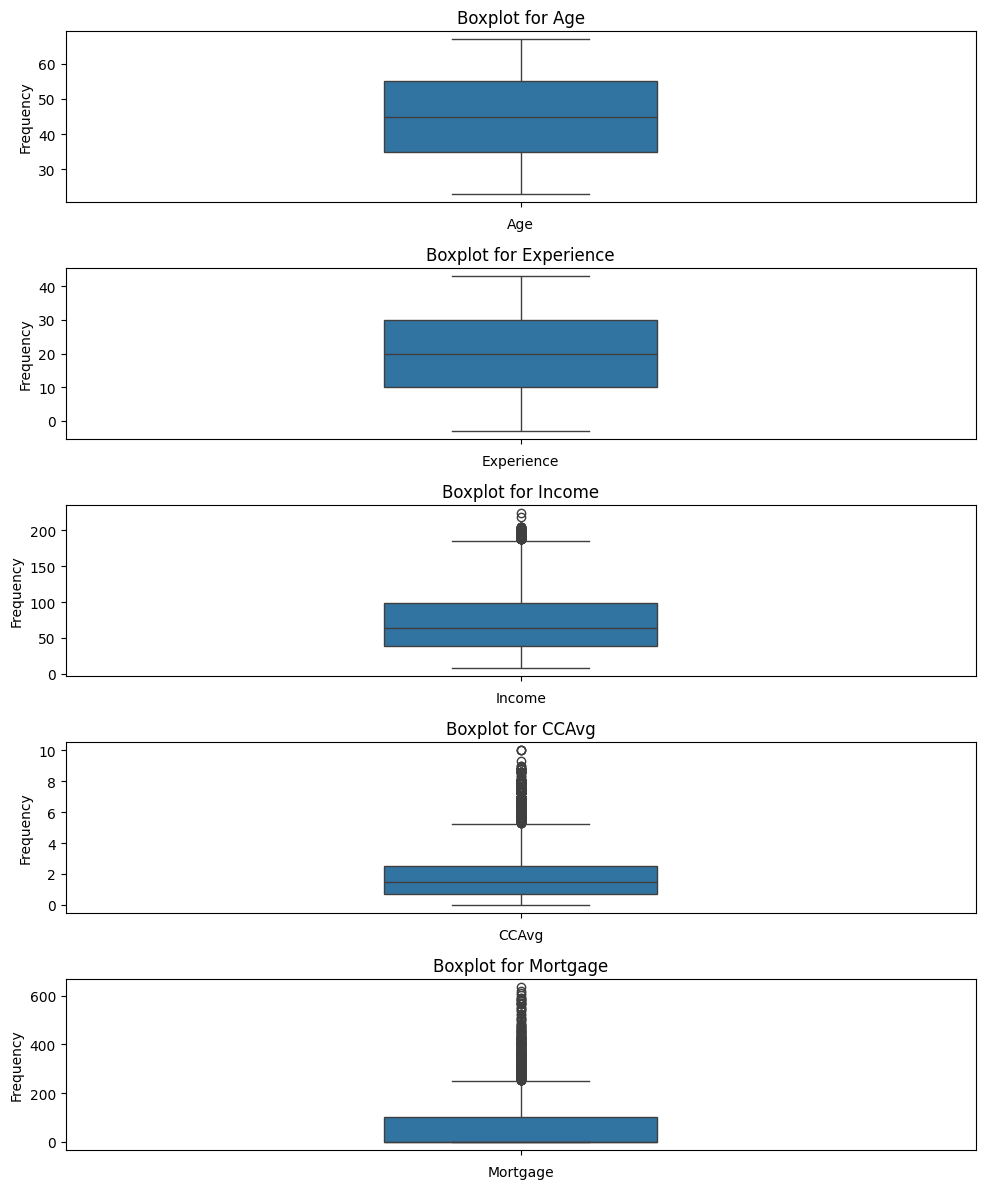

In [16]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(10, 12))

# Iterate over variables
for i, var in enumerate(variables):
    # Add boxplot
    sns.boxplot(data=loan, y=var, ax=axes[i], width=0.3)
    # Set title
    axes[i].set_title(f'Boxplot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

In [17]:
loan['Personal_Loan'].value_counts()/5000*100

Personal_Loan
0    90.4
1     9.6
Name: count, dtype: float64

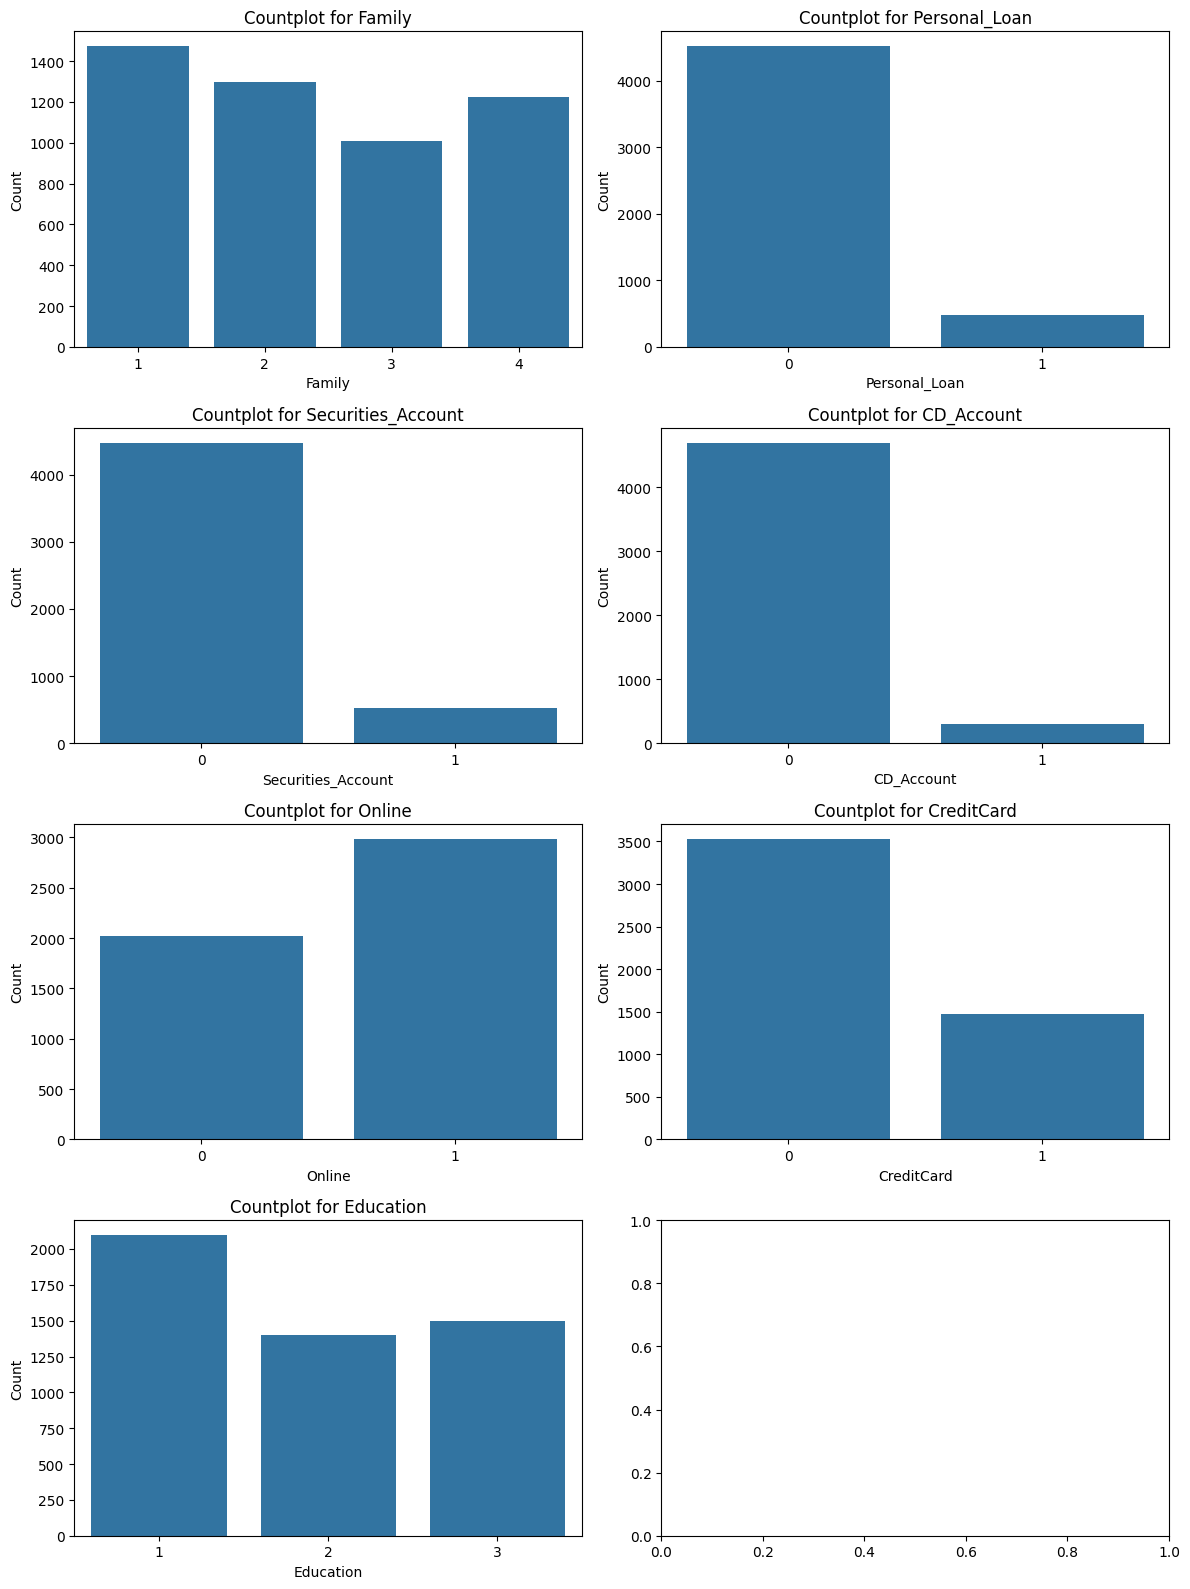

In [18]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Variables to plot
variables = ['Family', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education']

# Flatten axes for iteration
axes = axes.flatten()

# Iterate over variables
for i, var in enumerate(variables):
    # Plot countplot
    sns.countplot(data=loan, x=var, ax=axes[i])
    # Set title
    axes[i].set_title(f'Countplot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

##Findings from univariate analysis
- There is a major class difference present in the target variable.
- The age distribution shows a peak around 40-45 years old, indicating a normal distribution of ages within the population sample.
- Experience levels are clustered around 20 years, suggesting a common level of experience among individuals.
- The income range for most individuals is between $50,000 and $75,000, exhibiting a few higher-income outliers and showcasing a right-skewed distribution.
- Credit card spending (CCAvg) has a right-skewed distribution, with a decrease in frequency as spending increases.
- Mortgage values display an extreme right skewness, suggesting that many individuals have low mortgage values.
- The distribution of family sizes shows the majority with a family size of 1, followed by those with a family size of 2, and lower counts for sizes 3 and 4.
- Personal loan status is represented in a binary distribution, where most individuals did not take a personal loan.
- Securities account status is depicted, with the majority of individuals not having one.
- Similarly, the presence of Certificate of Deposit (CD) accounts among most individuals is low.
- Online banking usage is indicated, with a significant number of individuals utilizing online services.
- Credit card ownership is displayed, revealing that more individuals do not own a credit card issued by the bank.
- The distribution of education levels shows the highest count at level 1, followed closely by level 3, and then level 2.

##Bivariate analysis

##Approach
- Here again I will divide the available features into 2 categories including numerical and categorical data. For numerical data I will plot barplot and boxplot to see thier relationship with target variable `Personal_loan`. For the categorical data I will plot to establish the relationship with target variable.

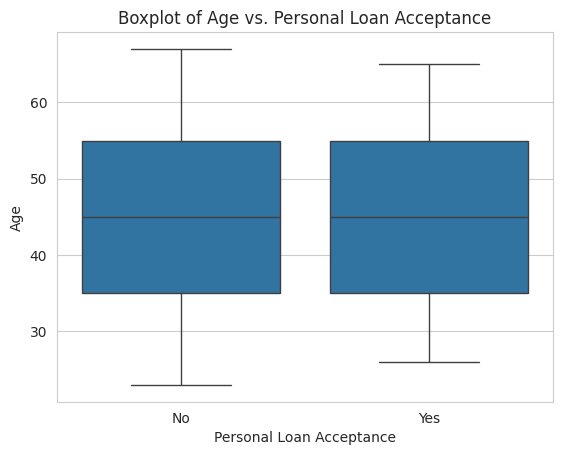

In [19]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Age')
plt.title('Boxplot of Age vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

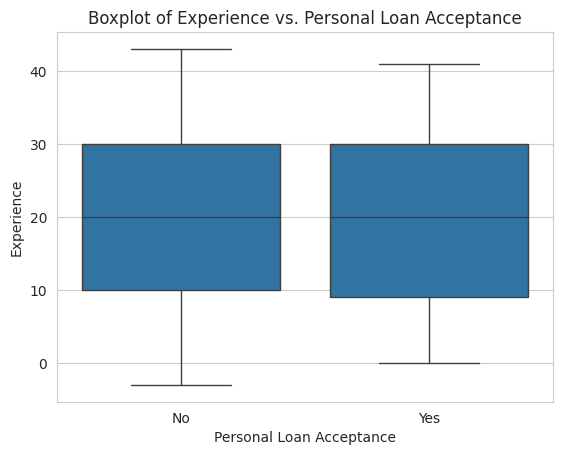

In [20]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Experience')
plt.title('Boxplot of Experience vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Experience')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

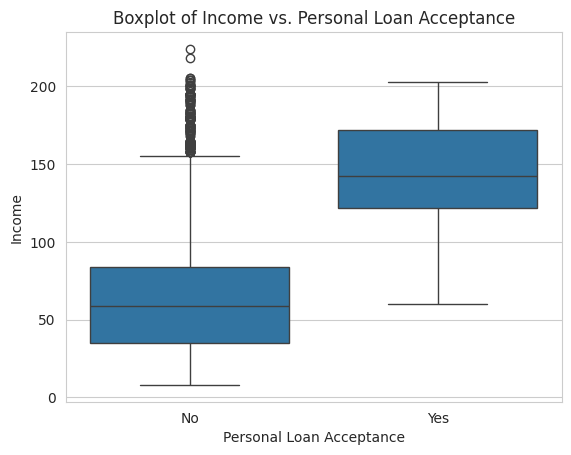

In [21]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Income')
plt.title('Boxplot of Income vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

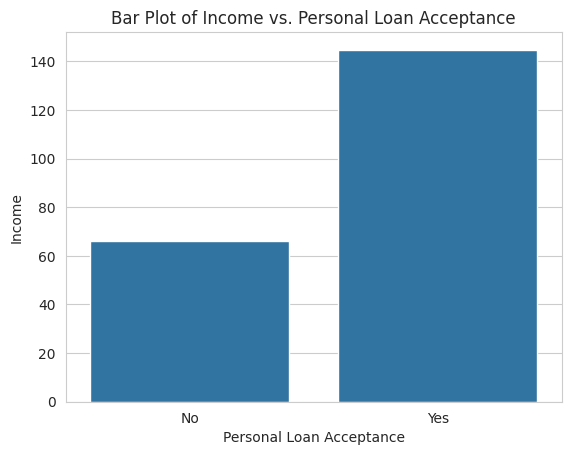

In [22]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
sns.barplot(data=loan, x='Personal_Loan', y='Income', ci=None)
plt.title('Bar Plot of Income vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

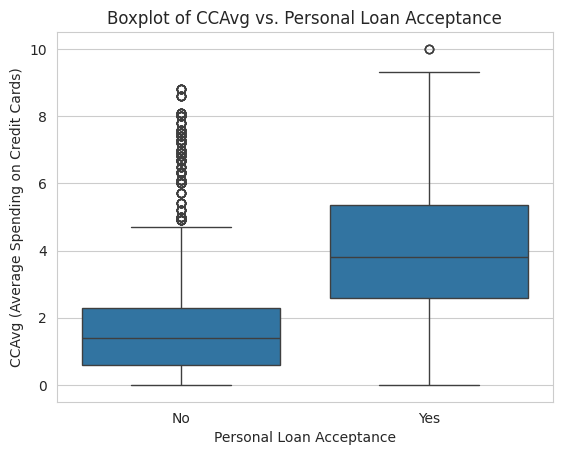

In [23]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='CCAvg')
plt.title('Boxplot of CCAvg vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('CCAvg (Average Spending on Credit Cards)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

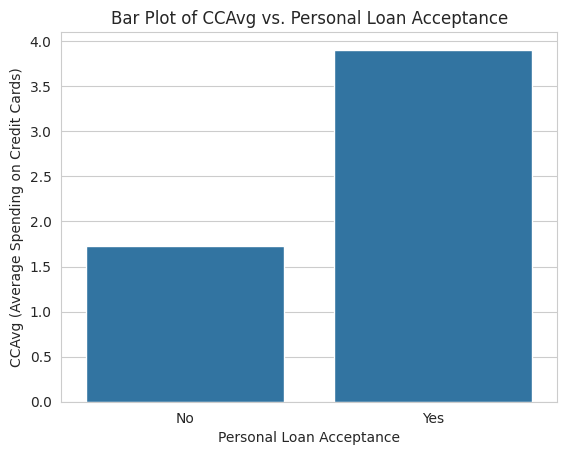

In [24]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
sns.barplot(data=loan, x='Personal_Loan', y='CCAvg', ci=None)
plt.title('Bar Plot of CCAvg vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('CCAvg (Average Spending on Credit Cards)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [25]:
# Convert Mortgage feature into categorical
loan['Mortgage_Categorical'] = loan['Mortgage'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
loan['Mortgage_Categorical'].value_counts()

Mortgage_Categorical
0    3462
1    1538
Name: count, dtype: int64

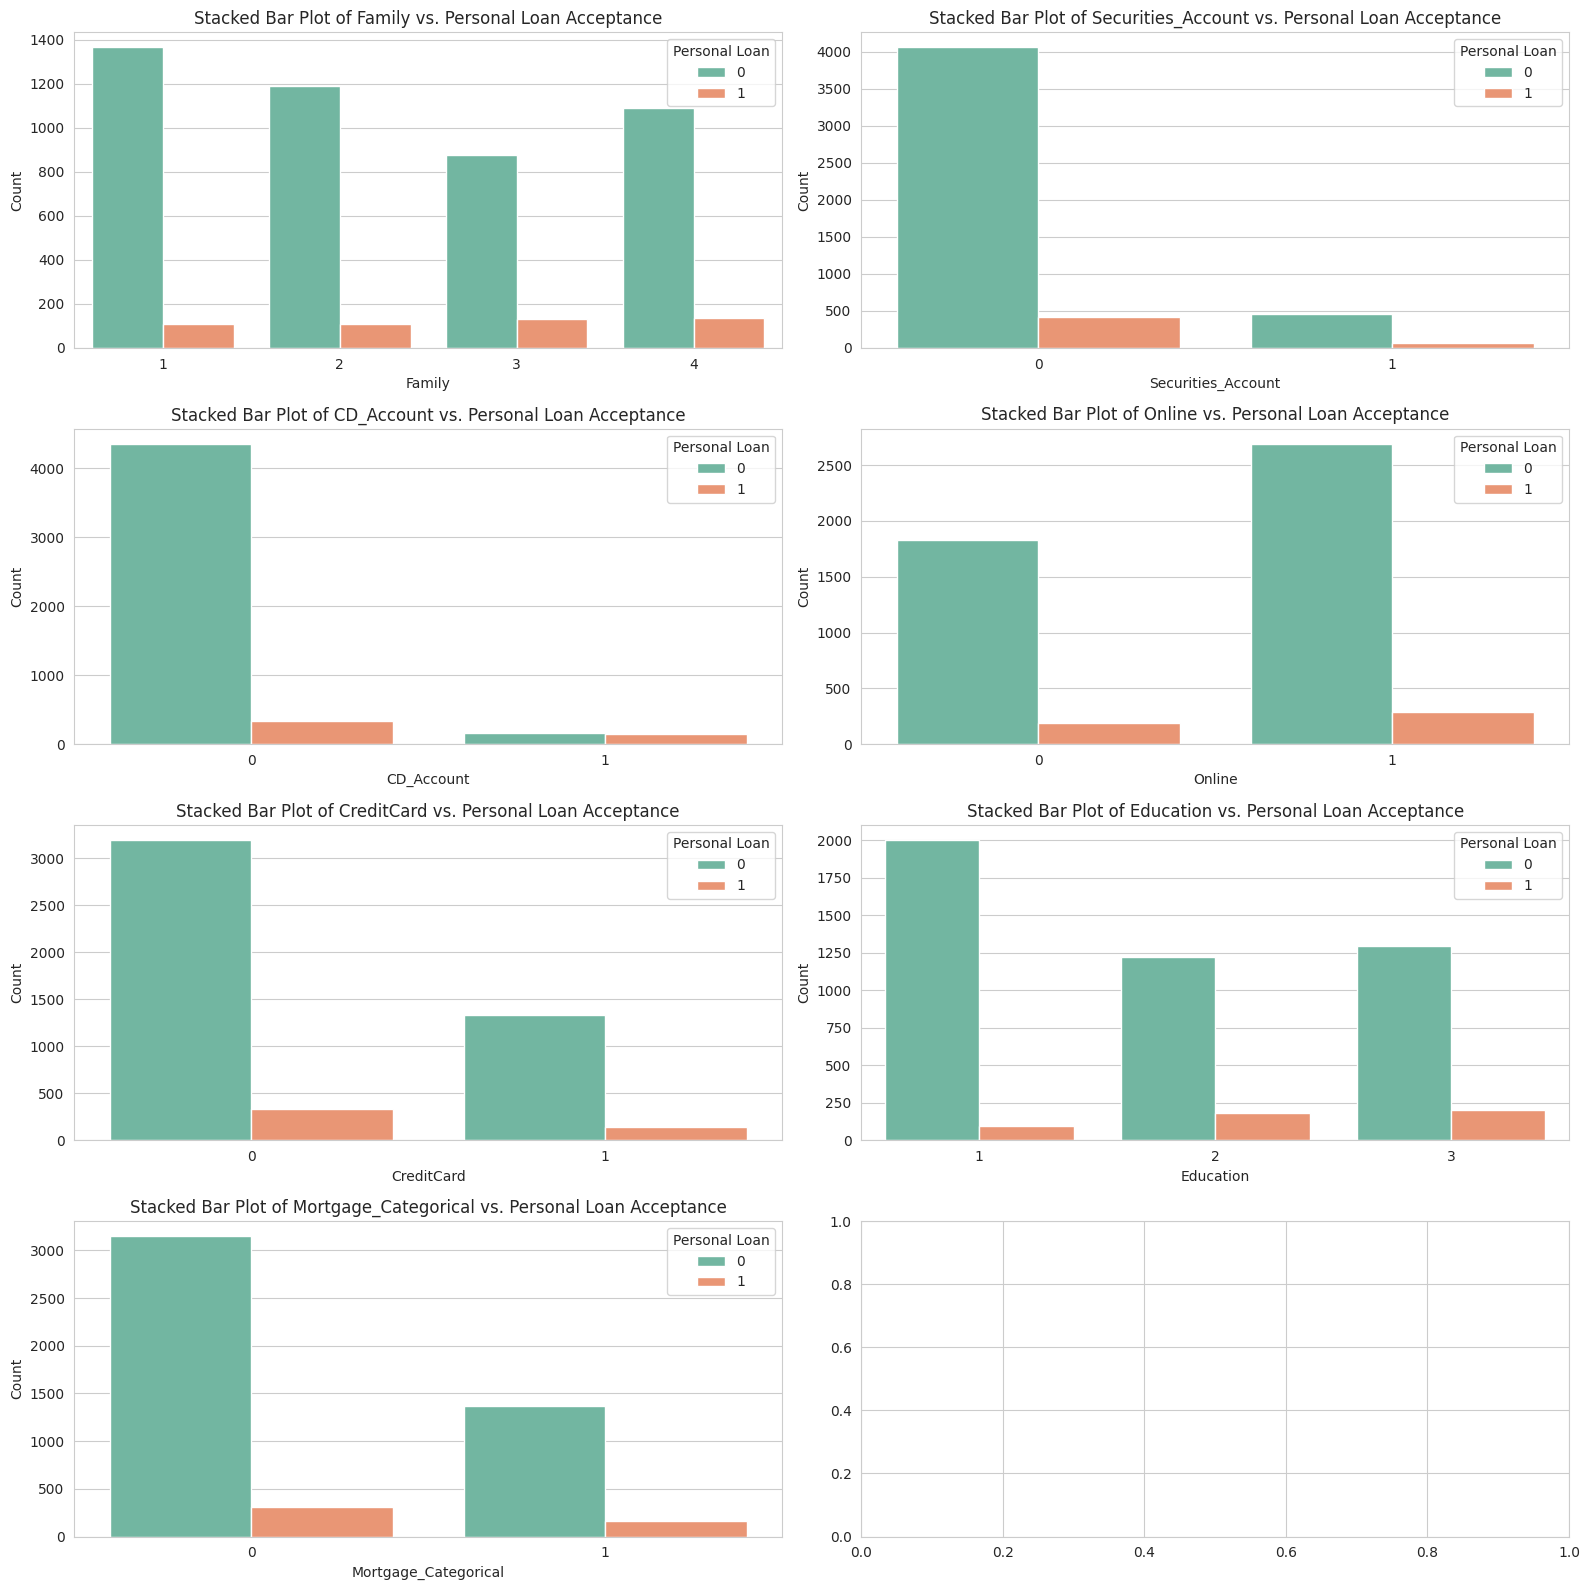

In [27]:
# Define the categorical features
categorical_features = ['Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education', 'Mortgage_Categorical']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the categorical features and create stacked bar plots
for i in range(len(categorical_features)):
    sns.countplot(data=loan, x=categorical_features[i], hue='Personal_Loan', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Stacked Bar Plot of {categorical_features[i]} vs. Personal Loan Acceptance')
    axes[i].set_xlabel(categorical_features[i])
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Personal Loan', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

##Findings from Bivariate analysis
- Age might not be a significant factor in determining the acceptance of personal loans, as there isn't a noticeable difference in age distribution between those who were accepted and those who were not.
- Experience might also not be a significant factor in determining the acceptance of personal loans, as there isn't a noticeable difference in experience distribution between those who were accepted and those who were not.
- People with higher incomes are more likely to be accepted for a personal loan.
- People with higher CCAvg spending are more likely to be accepted for a personal loan.
- Personal loan acceptance rates tend to increase with larger family sizes, indicating a positive correlation between family size and loan approval.
- Individuals without a securities account are more likely to have their personal loans accepted, suggesting a negative association between securities account ownership and loan approval.
- Having a Certificate of Deposit (CD) account is associated with a higher rate of personal loan acceptance, suggesting a positive correlation between CD account ownership and loan approval.
- People who use online banking services have a higher rate of personal loan acceptance, indicating a positive relationship between online usage and loan approval.
- Not owning a credit card issued by the bank is linked to a higher rate of personal loan acceptance, suggesting a negative correlation between credit card ownership and loan approval.
- Higher education levels are associated with an increased rate of personal loan acceptance, indicating a positive correlation between education level and loan approval.
- Individuals with category 0 mortgage (likely no mortgage or low mortgage) have a higher rate of personal loan acceptance, suggesting a negative association between mortgage category and loan approval.

## Data Preprocessing

* Missing value treatment (No need as there are no missing values present)
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

##Feature engineering

###Remove negative values from Experience feature

In [28]:
loan["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [29]:
# checking for experience <0
loan[loan["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [30]:
# Correcting the experience values
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

In [31]:
# checking for experience <0
loan[loan["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

###Convert ZIPCode into categorical feature

In [32]:
loan["ZIPCode"].nunique()

467

In [33]:
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    loan["ZIPCode"].str[0:2].nunique(),
)
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]

loan["ZIPCode"] = loan["ZIPCode"].astype("int")

Number of unique values if we take first two digits of ZIPCode:  7


##Outlier detection and treatment

In [34]:
# Calculate the IQR for 'Income' and 'CCAvg'
Q1_income = loan['Income'].quantile(0.25)
Q3_income = loan['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_ccavg = loan['CCAvg'].quantile(0.25)
Q3_ccavg = loan['CCAvg'].quantile(0.75)
IQR_ccavg = Q3_ccavg - Q1_ccavg

# Define the lower and upper bounds for outlier detection
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_ccavg = Q1_ccavg - 1.5 * IQR_ccavg
upper_bound_ccavg = Q3_ccavg + 1.5 * IQR_ccavg

# Remove outliers from 'Income' and 'CCAvg' features
loan_no_outliers = loan[(loan['Income'] >= lower_bound_income) & (loan['Income'] <= upper_bound_income) &
                        (loan['CCAvg'] >= lower_bound_ccavg) & (loan['CCAvg'] <= upper_bound_ccavg)]

# Display the shape before and after applying the method
print("Shape before removing outliers:", loan.shape)
print("Shape after removing outliers:", loan_no_outliers.shape)

Shape before removing outliers: (5000, 15)
Shape after removing outliers: (4623, 15)


##Removing un necessary features

In [35]:
# Remove 'ID', 'ZIPCode', and 'Mortgage' columns from the dataset
loan_no_outliers.drop(['ID', 'Mortgage'], axis=1, inplace=True)

#Preparing data for modeling

##Making features and target

In [36]:
# Define the input features (X) and output feature (y)
X = loan_no_outliers.drop(columns=['Personal_Loan'])
y = loan_no_outliers['Personal_Loan']

##Splitting data into training and test set

In [37]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3698, 12)
Shape of y_train: (3698,)
Shape of X_test: (925, 12)
Shape of y_test: (925,)


##Handling imbalanced data using SMOTE

- Due to the highly imbalanced distribution of the target variable, with only 9.6 of data points belonging to the loan category and remaining to the no loan category, using traditional machine learning algorithms may lead to biased models. To address this issue, I plan to employ the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling. This technique aims to create a more balanced distribution of both classes, allowing the algorithm to generalize effectively and avoid biases towards the overrepresented class.

In [38]:
# Using SMOTE to balance the target class in the training set only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Building

##Approach
The approach will involve the application of cost-complexity pruning (CCP), which will be used to reduce overfitting in the decision tree model. Through CCP, the decision tree will be iteratively pruned by removing nodes with the weakest link, aiming to enhance the generalization capability of the model. The cost complexity of each subtree will be calculated, and nodes will be pruned based on the smallest cost complexity parameter (alpha). This parameter will be optimized via cross-validation to strike a balance between model complexity and performance. Consequently, the decision tree's structure will be refined to improve its predictive accuracy and robustness against overfitting, contributing to the effectiveness of the model in predicting personal loan purchases by customers.

### Model Evaluation Criterion

### Model Building

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [41]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

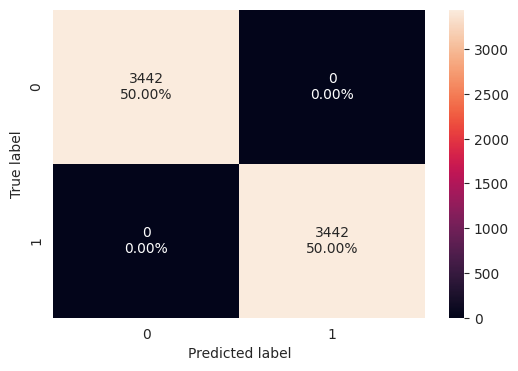

In [42]:
confusion_matrix_sklearn(model, X_train, y_train)

In [43]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Visualizing the Decision Tree

In [44]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage_Categorical']


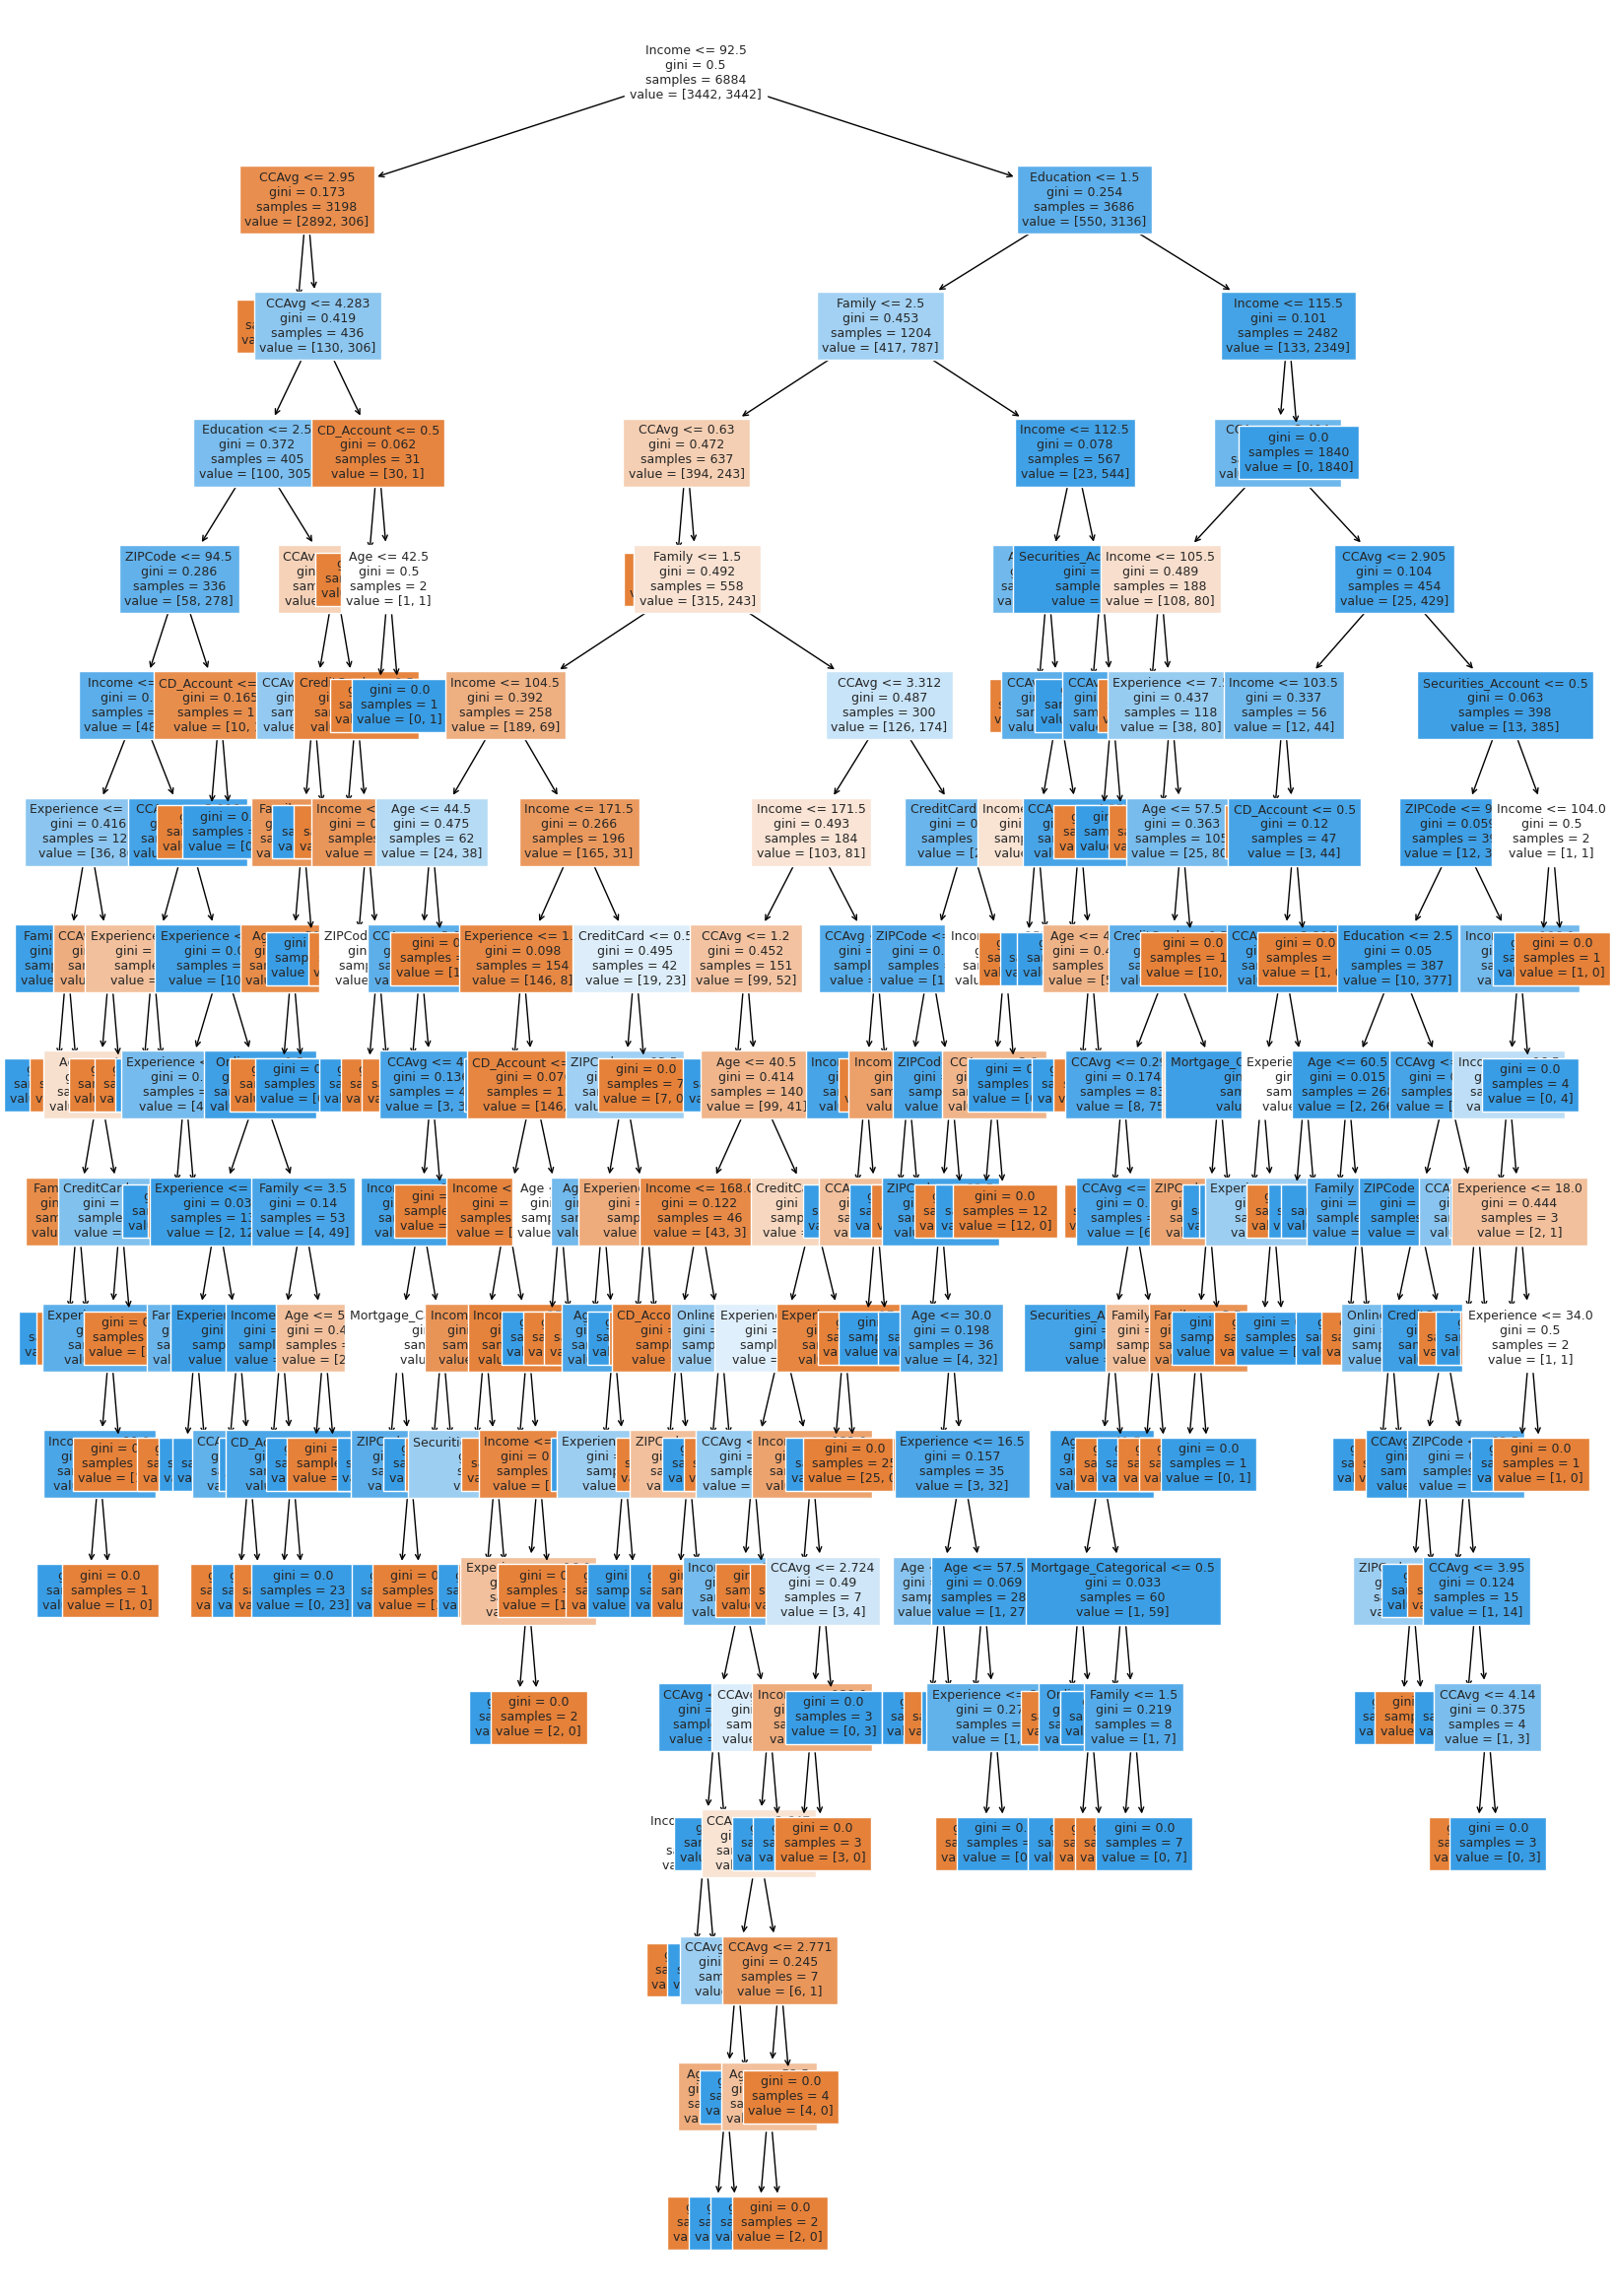

In [45]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [46]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2762.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.28
|   |   |   |--- Education <= 2.50
|   |   |   |   |--- ZIPCode <= 94.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 74.00] class: 1
|   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.59
|   |   |   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  41.50
|   

In [47]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

display(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

,Imp
Income,0.625294
CCAvg,0.184722
Family,0.072274
Education,0.046871
Age,0.022956
Experience,0.022652
ZIPCode,0.010418
CreditCard,0.008189
CD_Account,0.003339
Online,0.001515


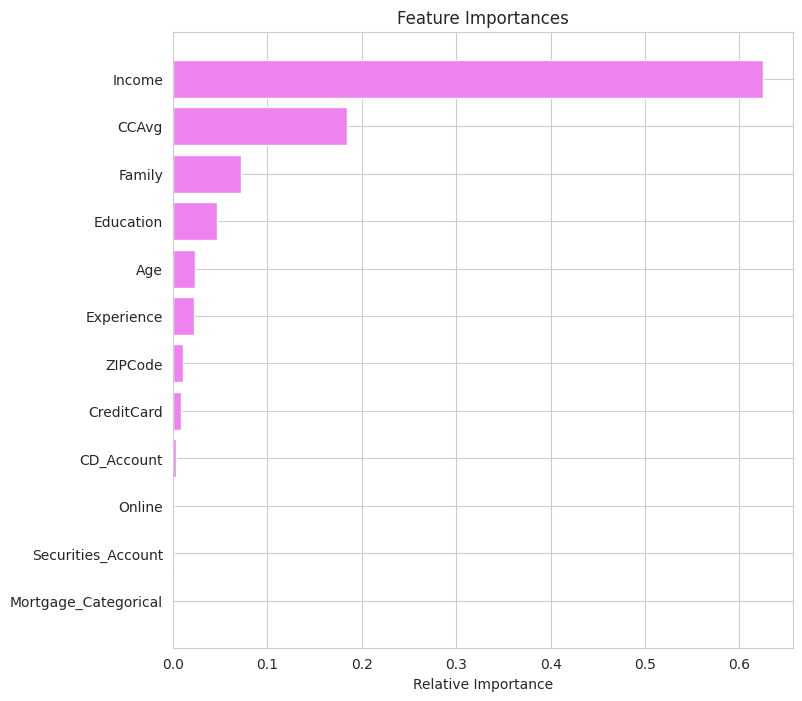

In [48]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

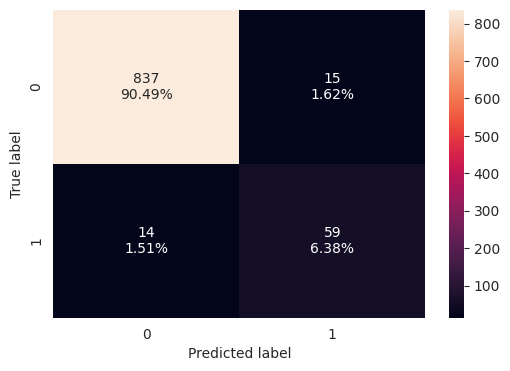

In [49]:
confusion_matrix_sklearn(model,X_test,y_test)

In [50]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.968649,0.808219,0.797297,0.802721


### Model Performance Improvement

#### Pre-Pruning

In [51]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=3, random_state=1)

**Checking performance on training data**

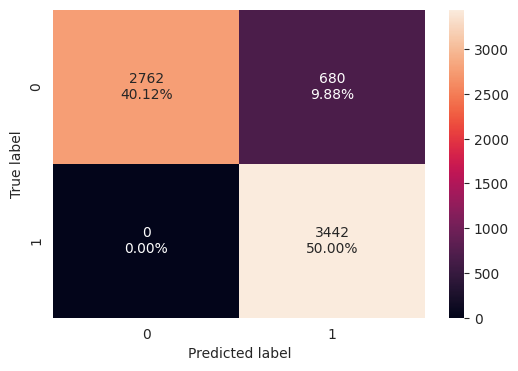

In [52]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [53]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.90122,1.0,0.835032,0.9101


**Visualizing the Decision Tree**

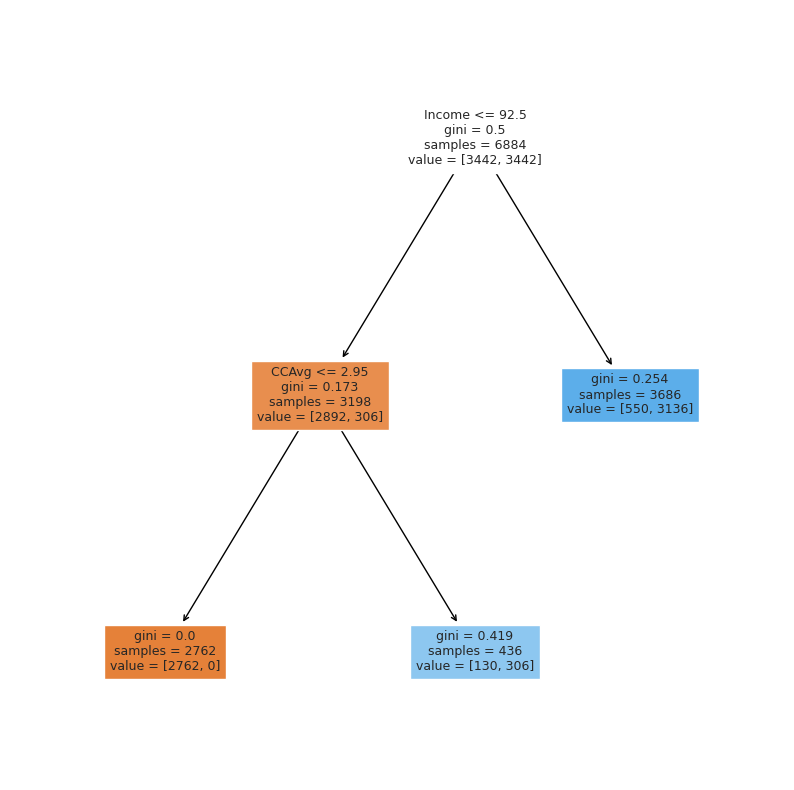

In [54]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [55]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2762.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [130.00, 306.00] class: 1
|--- Income >  92.50
|   |--- weights: [550.00, 3136.00] class: 1



In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

display(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

,Imp
Income,0.840353
CCAvg,0.159647
Age,0.000000
Experience,0.000000
ZIPCode,0.000000
Family,0.000000
Education,0.000000
Securities_Account,0.000000
CD_Account,0.000000
Online,0.000000


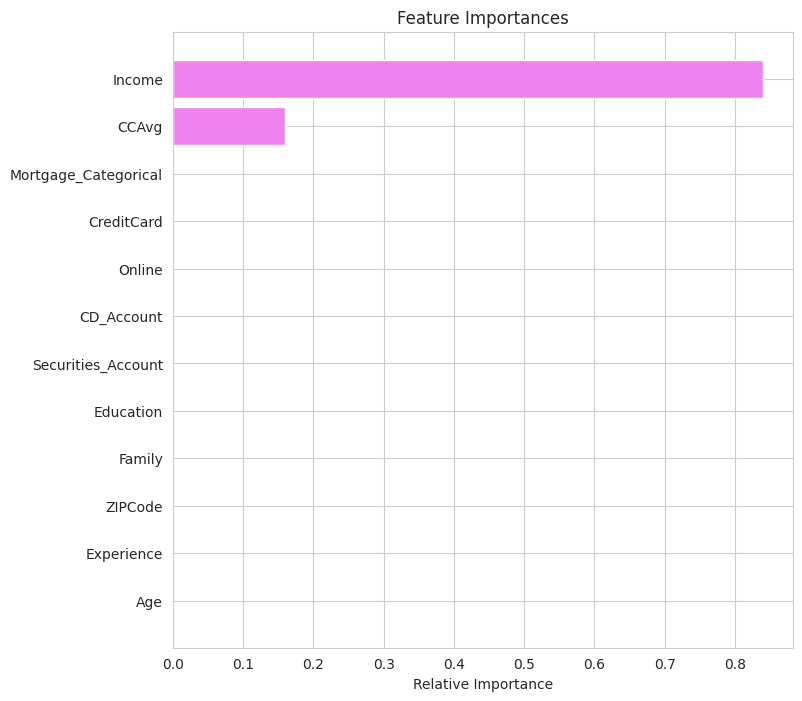

In [57]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

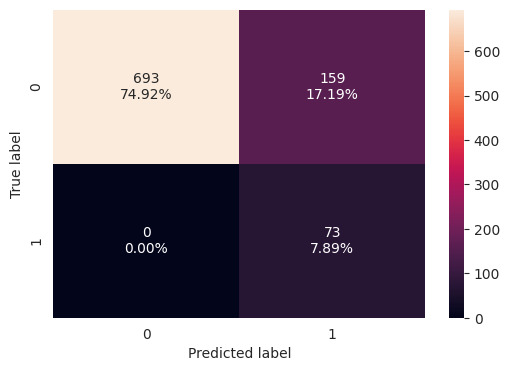

In [58]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [59]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.828108,1.0,0.314655,0.478689


#### Cost-Complexity Pruning

In [60]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [61]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000094,0.000281
2,0.000096,0.000569
3,0.000097,0.000763
4,0.000125,0.001012
...,...,...
85,0.005867,0.096801
86,0.008177,0.113155
87,0.024650,0.162455
88,0.053888,0.216343


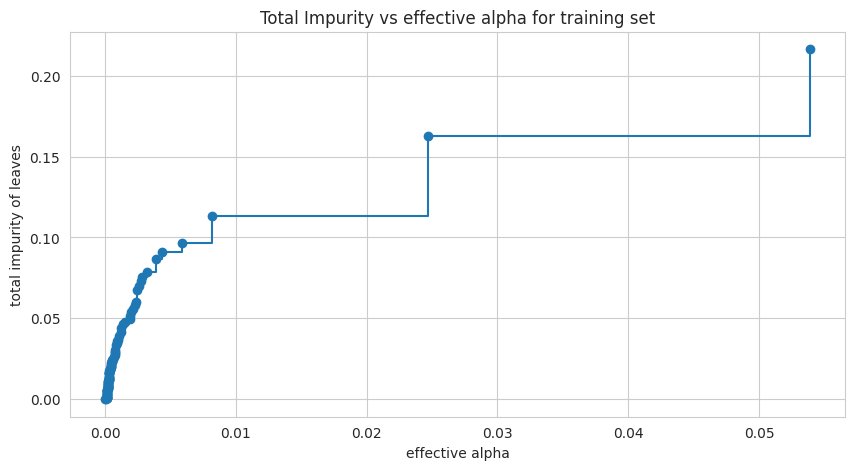

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [63]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.28365683652662727


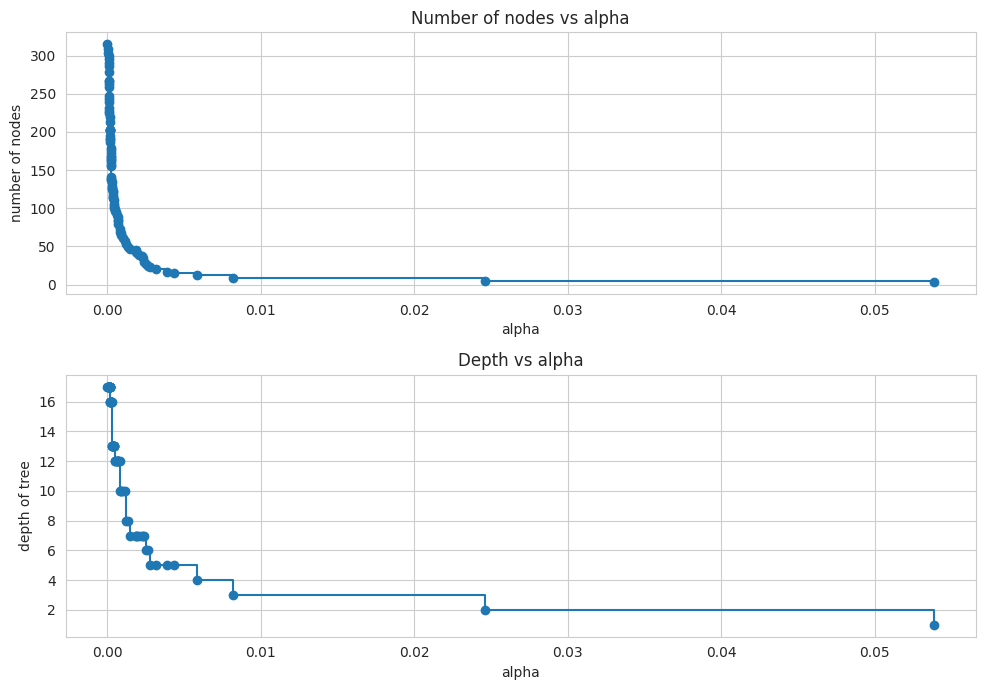

In [64]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [65]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

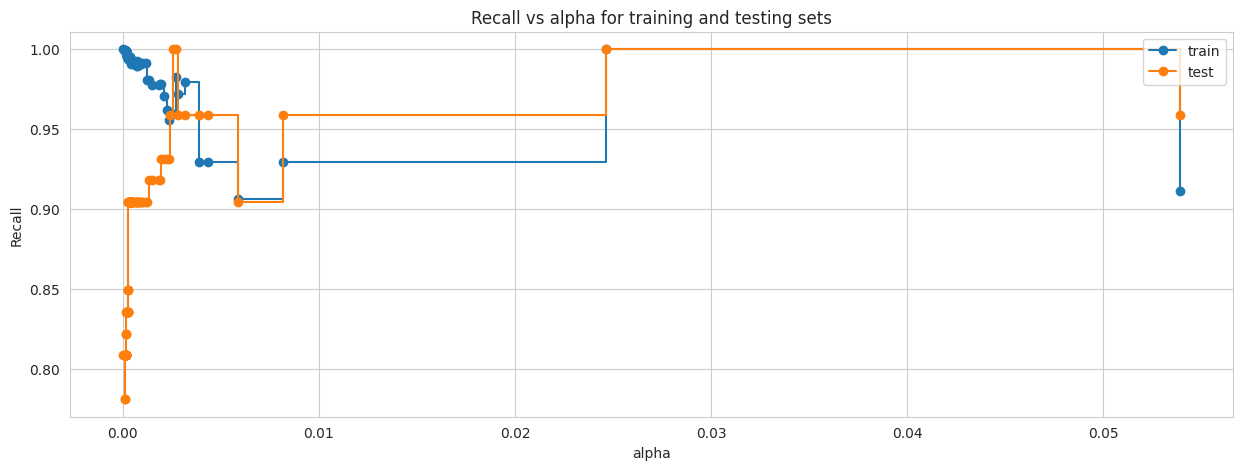

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [67]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0025562365799662195, random_state=1)


#### Post-Purning

In [68]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.000774764566003073, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000774764566003073, random_state=1)

**Checking performance on training data**

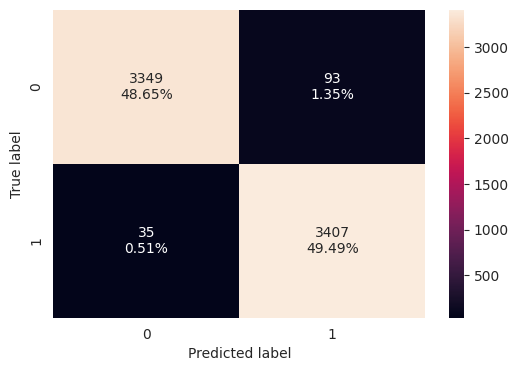

In [69]:
confusion_matrix_sklearn(estimator_2,X_train,y_train)

In [70]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2,X_train,y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.981406,0.989831,0.973429,0.981562


**Visualizing the Decision Tree**

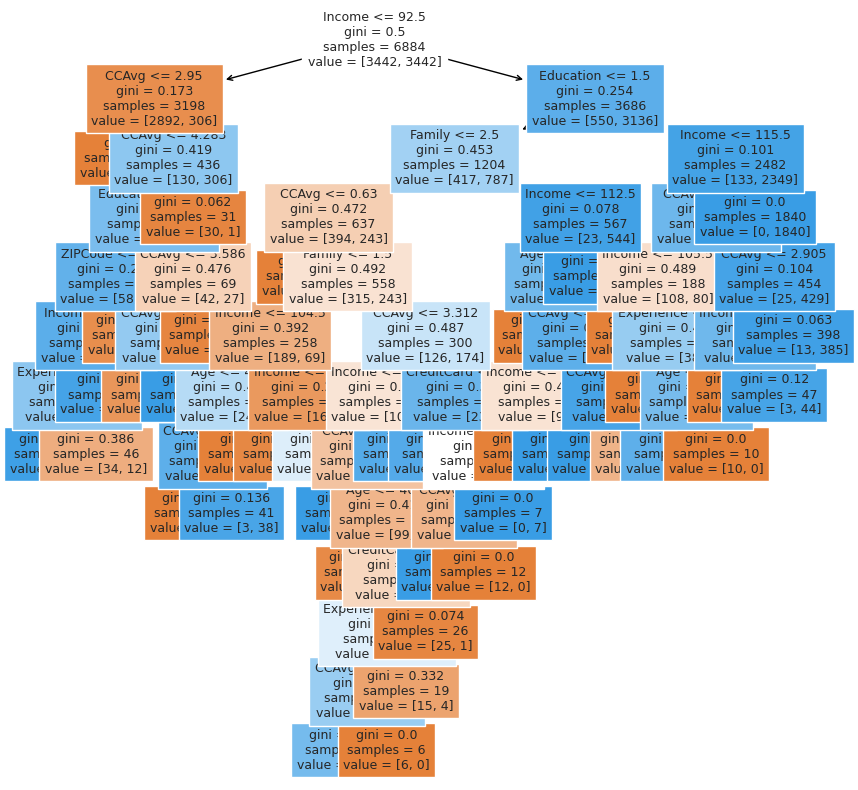

In [71]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [72]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2762.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.28
|   |   |   |--- Education <= 2.50
|   |   |   |   |--- ZIPCode <= 94.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |   |   |--- weights: [2.00, 74.00] class: 1
|   |   |   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |   |   |--- weights: [34.00, 12.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- weights: [12.00, 191.00] class: 1
|   |   |   |   |--- ZIPCode >  94.50
|   |   |   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |   |--- Education >  2.50
|   |   |   |   |--- CCAvg <= 3.59
|   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |--- weights: [12.00, 2.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |--- weights: [0.00, 24.00] class: 1
|   |   |   |   |--- CCAvg >  3.59
|   |   |   | 

In [73]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

display(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

,Imp
Income,0.658524
CCAvg,0.182916
Family,0.070423
Education,0.049756
Experience,0.014987
Age,0.014892
CreditCard,0.004683
ZIPCode,0.003819
Securities_Account,0.000000
CD_Account,0.000000


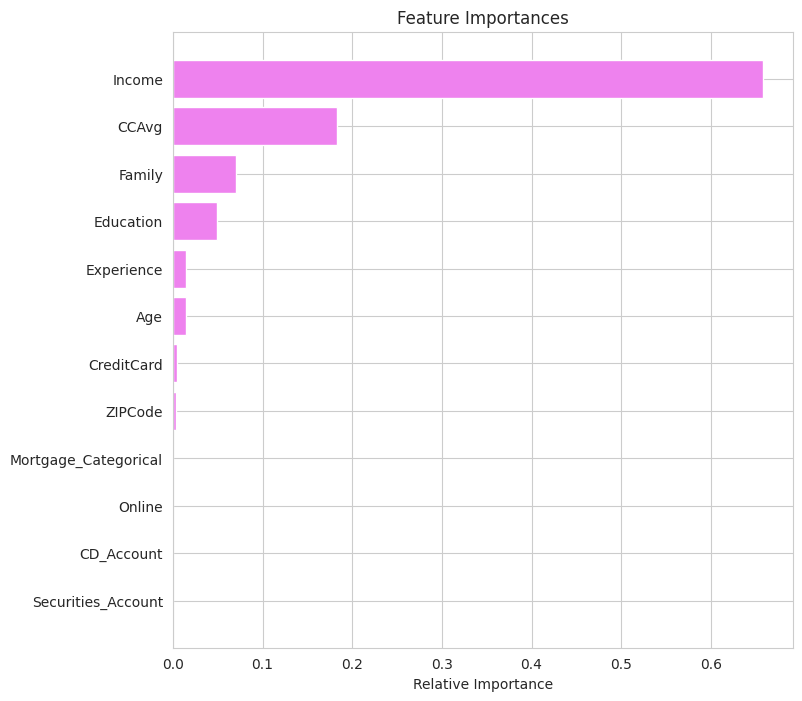

In [74]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

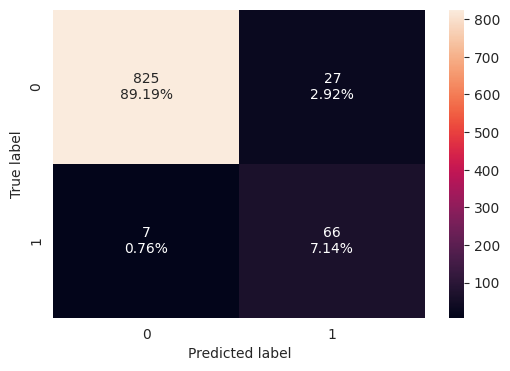

In [75]:
confusion_matrix_sklearn(estimator_2,X_test,y_test)

In [76]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2,X_test,y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.963243,0.90411,0.709677,0.795181


## Model Comparison and Final Model Selection

In [77]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.901220,0.981406
Recall,1.0,1.000000,0.989831
Precision,1.0,0.835032,0.973429
F1,1.0,0.910100,0.981562


In [78]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.968649,0.828108,0.963243
Recall,0.808219,1.000000,0.904110
Precision,0.797297,0.314655,0.709677
F1,0.802721,0.478689,0.795181


## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the bank?**

A targeted marketing strategy based on customer demographics and financial behaviors is likely to yield the best results in increasing personal loan sales and expanding AllLife bank's customer base. Below are detailed recommendations for enhancing AllLife Bank's business approach and refining its technical strategies to increase the odds of selling more lending products among existing deposit customers:

**Business Strategy**

- **Targeted Marketing Campaigns:** AllLife Bank should intensify its marketing efforts towards customers exhibiting key characteristics such as higher incomes, increased credit card expenditure, larger families, and advanced education levels, given their stronger propensity to accept personal loan offers.
- **Expand Customer Base:** Focus on customers lacking securities or credit card accounts with AllLife Bank, as these individuals show a higher tendency to respond positively to personal loan proposals, representing a strategic opportunity to broaden the bank's lending clientele.
- **Leverage Digital Banking and Incentives:** Enhance the promotion of online banking features and introduce incentives for customers to open Certificate of Deposit (CD) accounts, strategies that are likely to foster a greater acceptance of personal loan offers among the bank's customer base.

**Technical Strategy**

- **Optimize Targeting with Post-Pruning:** Deploy the post-pruning decision tree model to refine the bank's targeting strategies for cross-selling lending products, utilizing its superior recall on new data to enhance prediction accuracy and customer targeting.
- **Benchmark with High Recall Scores:** Employ the decision tree model's high recall as a standard for pinpointing potential lending product customers among existing depositors, ensuring more effective and efficient marketing and customer outreach.
- **Enhance Model Evaluation and Innovation:** Establish a robust evaluation framework that regularly assesses predictive models, prioritizing methods like post-pruning for their effectiveness in generalization. Additionally, consider further feature engineering or advanced algorithms to continuously improve recall scores and cross-selling outcomes.

___